In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# from tpot import TPOTRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings

In [2]:
df_air = pd.read_csv('../../raw_data/Gida Will --_ Water & Air Data  - Air Data.csv')

In [3]:
df_air['Température 1 (◦C)'].value_counts()

24.6     148
24.2     139
24.3     122
24.1     110
24.5     108
        ... 
26.69      1
26.71      1
26.72      1
26.88      1
17.68      1
Name: Température 1 (◦C), Length: 1010, dtype: int64

In [4]:
df_air.columns

Index(['Date', 'Température 1 (◦C)', 'Température 2 (◦C)',
       'Température 3 (◦C)', 'Humidité 1 (%)', 'Humidité 2 (%)',
       'Humidité 3 (%)', 'CO2 (ppm)', 'Unnamed: 8'],
      dtype='object')

In [5]:
df_g1 = pd.read_csv('../../raw_data/Gida Will --_ Water & Air Data  - Groupe 1 (Twr 1,2,3,4).csv', low_memory=False)
df_g1.columns = df_g1.iloc[0] 
df_g1 = df_g1[1:]

In [6]:
print(df_g1.columns)
print(f'\n length: {len(df_g1.columns)}')
print(len(df_g1))

Index([                  'Date',       'nutriments (S21)',
                     'Avg. E.C',       'Water Temp (S22)',
               'Avg. TEMP (°F)',               'pH (S23)',
                      'Avg. pH', 'twr  level (in " S31) ',
         'Avg. Tower Level (")',           'Dissolved O2',
                'Avg. DO (ppm)',        'Flowswitch (D1)',
              'tower valv (R1)',        'tower pump (R2)',
              'Lvl ntrlck (R3)',        'PRGHGHCOND (R4)',
                   'Alarm (R5)',            'Manual (R6)',
                  'Manual (R7)',            'Manual (R8)',
               'PSC pump (A41)',           'nutA&B (A42)',
               'pH- Pump (A43)',         'pH+ Pump (A44)',
                            nan,                      nan,
                            nan,                      nan,
                            nan,                      nan,
                            nan,                      nan],
      dtype='object', name=0)

 length: 32
29608


In [145]:
df_g2 = pd.read_csv('../../raw_data/Gida Will --_ Water & Air Data  - Groupe 2 (Twr 5,6,7,8).csv', low_memory=False)
df_g2.columns = df_g2.iloc[0] 
df_g2 = df_g2[1:]

In [8]:
print(df_g2.columns)
print(f'\n length: {len(df_g2.columns)}')
print(len(df_g2))

Index([                  'Date',              'PSC (S11)',
                     'Avg. PSC',       'nutriments (S21)',
                     'Avg. E.C',       'Water Temp (S24)',
               'Avg. TEMP (°F)',               'pH (S23)',
                       'Avg pH', 'twr  level (in " S31) ',
         'Avg. Tower Level (")',        'Flowswitch (D1)',
              'tower valv (R1)',        'tower pump (R2)',
              'Lvl ntrlck (R3)',        'PRGHGHCOND (R4)',
                   'Alarm (R5)',            'Manual (R6)',
                  'Manual (R7)',            'Manual (R8)',
               'PSC pump (A41)',           'nutA&B (A42)',
               'pH- Pump (A43)',         'pH+ Pump (A44)',
                   'Off / On 1',             'Off / On 2',
                   'Off / On 3',               'Comments',
                            nan,                      nan,
                            nan],
      dtype='object', name=0)

 length: 31
55066


In [9]:
df_g2['Lvl ntrlck (R3)'].value_counts()

Off    48891
On      2405
Name: Lvl ntrlck (R3), dtype: int64

In [10]:
df_g56 = pd.read_csv('../../raw_data/Gida Will --_ Water & Air Data  - Group 5 & 6 (Twr 17 to 24).csv', low_memory=False)
df_g56.columns = df_g56.iloc[0] 
df_g56 = df_g56[1:]

In [11]:
print(df_g56.columns)
print(f'\n length: {len(df_g56.columns)}')
print(len(df_g56))

Index([            'Date',   'G6 nutAB (S11)',    'G6 temp (S12)',
            'G6 Ph (S13)',    'G6 Temp (S14)',   'G5 nutAB (S21)',
          'G5 temp (S22)',      'G5 Ph (S23)',    'G5 Temp (S24)',
            'G6 dO (S31)',  'G6 TnkLVL (S32)',  'G5 TnkLVL (S33)',
            'G5 dO (S34)',     'G6 Flow (D1)',     'G5 Flow (D2)',
       'G6 tnkFEED (R11)',          '- (R12)', 'G5 TnkFEED (R13)',
                '- (R14)',          '- (R21)',          '- (R22)',
                '- (R23)',          '- (R24)', 'G6 Tnk PMP (R31)',
                '- (R32)', 'G5 Tnk PMP (R33)',          '- (R34)',
       'G6 nAB pmp (A41)', 'G6 Ph pump (A42)', 'G5 nAB pmp (A43)',
       'G5 Ph pump (A44)',                nan],
      dtype='object', name=0)

 length: 32
131554


In [12]:
import re

def key_cleaner(df):
    cleaned_keys = []
    keys = df.columns
    for i in keys:
        print(i[0])
        cleaned_keys.append(i.strip().lower().replace(' ','_'))
    return cleaned_keys

In [13]:
!pwd

/home/williamjwall/code/gidahusa/Aquaverti-Data-Analysis/notebooks


In [14]:
# import pandas as pd
# import glob
# import os

# path = r'../../raw_data'
# all_files = glob.glob(os.path.join(path , "*.csv"))

# lista = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0, low_memory=False)
#     lista.append(df)

# frame = pd.concat(lista, axis=0, ignore_index=True)

In [15]:
# frame.shape

In [16]:
plant_health_df = pd.read_csv('../../raw_data/Copy of Copy of Trackers (2.0) - Plant health.csv')
harvest_df = pd.read_csv('../../raw_data/Copy of Copy of Trackers (2.0) - Harvest.csv')

In [17]:
# plant_health_df['Tower:'].value_counts().sort_values(ascending=False)

In [18]:
grouping_towers_dicta = {"group 1": ["Tower 1", "Tower 2","Tower 3", "Tower 4"],
                         "group 2": ["Tower 5", "Tower 6","Tower 7", "Tower 8"],
                         "group 5/6": ["Tower 14", "Tower 15","Tower 16", "Tower 17", "Tower 18", "Tower 19","Tower 20", "Tower 21", "Tower 22", "Tower 23","Tower 24"]}

In [19]:
harvest_df["Tower location:"].replace(["Tower 1", "Tower 2","Tower 3", "Tower 4"], "group 1", inplace=True)

In [20]:
harvest_df["Tower location:"].replace(["Tower 5", "Tower 6","Tower 7", "Tower 8"], "group 2", inplace=True)

In [21]:
harvest_df["Tower location:"].replace(["Tower 14", "Tower 15","Tower 16", "Tower 17", "Tower 18", "Tower 19","Tower 20", "Tower 21", "Tower 22", "Tower 23","Tower 24"], "group 5/6", inplace=True)

In [22]:
harvest_df["Tower location:"].replace(["Tower 9", "Tower 10","Tower 11", "Tower 12", "Tower 13"], "group other", inplace=True)

In [23]:
harvest_df['Tower location:'].value_counts().sort_values(ascending=False)

group 1         2010
group 2         1945
group 5/6        539
group other       78
                   1
Name: Tower location:, dtype: int64

In [24]:
group_1_harvest = harvest_df.groupby("Tower location:").get_group('group 1')[['Harvest date:','Transplant date:','Level location:', 'Total floats harvested:', 'Total weight for floats: (grams)', 'Avg weight per plant:']]

In [146]:
df_g2['Date'] = pd.to_datetime(df_g2['Date'])

In [350]:
group_1_harvest.head(2)

,Harvest date:,Transplant date:,Level location:,Total floats harvested:,Total weight for floats: (grams),Avg weight per plant:
29,2020-11-30,2020-11-16,Level 4,9,9334.0,14.40
32,2020-12-01,2020-11-20,Level 5,10,5585.0,7.76


In [27]:
df_g1['Date'] = pd.to_datetime(df_g1['Date'])

In [28]:
group_1_harvest['Harvest date:'] = pd.to_datetime(group_1_harvest['Harvest date:'])

In [29]:
group_1_harvest['Transplant date:'] = pd.to_datetime(group_1_harvest['Transplant date:'])

In [267]:
def average_of_cycle(dfy, dfX):
    lista = []
    lista2 = []
    for a, b in dfy[['Harvest date:', 'Transplant date:']].itertuples(index=False):
        lista.append(dfX[(dfX['Date'] < a) & (dfX['Date'] > b)])
    for i in lista[436:]:
        i = i.dropna(axis=1)
        i = i.set_index(i['Date'])
        i = i[i.columns[1:]].apply(lambda x: pd.to_numeric(x, errors='coerce'))
        df_mean = pd.DataFrame(i.select_dtypes(include=['float64','int64']).dropna(how='all', axis=1).mean()[:-10]).T
        lista2.append(df_mean)
    return lista2

In [268]:
avg = average_of_cycle(group_1_harvest, df_g1)

In [269]:
len(avg)

1574

In [345]:
concat1_grp_1 = pd.concat(avg[0:1415], join='outer')

In [347]:
lista45 = []
for i in avg[1416:]:
    lista45.append(pd.DataFrame(i.iloc[0][:7]).T)
concat2_grp_1 = pd.concat(lista45).dropna(axis=0, how='all')

In [351]:
g1_X = pd.concat([concat1_grp_1, concat2_grp_1])

<AxesSubplot: xlabel='0', ylabel='0'>

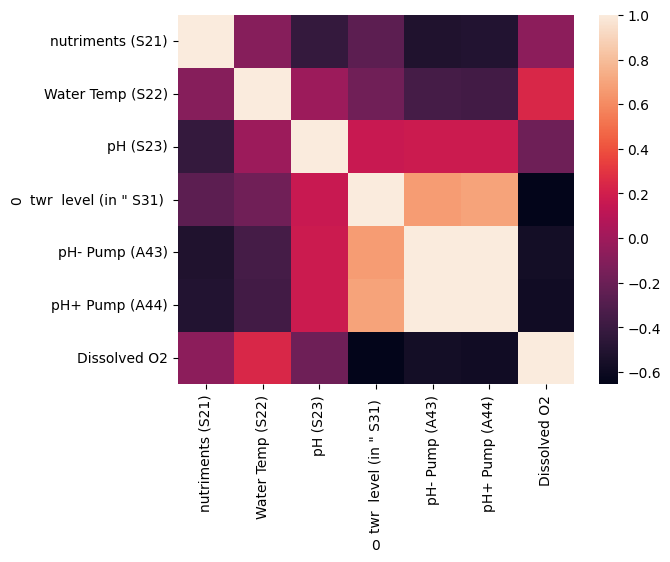

In [355]:
sns.heatmap(g1_X.corr())

In [354]:
g1_X.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
nutriments (S21),1562.0,1.707931,0.115163,1.088238,1.692293,1.759751,1.770820,1.808333
Water Temp (S22),1562.0,67.585130,6.687584,20.740119,67.821090,68.092354,68.780271,75.553086
pH (S23),1562.0,5.798517,0.090974,5.425905,5.786778,5.805929,5.821048,6.094828
"twr level (in "" S31)",1562.0,14.360130,0.467965,13.161936,14.141271,14.192691,14.653274,15.362463
pH- Pump (A43),979.0,24.639167,15.562826,8.697914,13.760603,18.714301,29.687885,71.591902
pH+ Pump (A44),979.0,24.045308,14.337525,8.710428,13.759750,18.532604,29.711917,69.393129
Dissolved O2,1249.0,2.692788,1.728025,-0.930681,1.742407,3.165567,3.872714,5.403525


In [402]:
dfXy_g1 = pd.concat([g1_X.reset_index(drop=True), group_1_harvest[436:].reset_index(drop=True)], axis=1)

In [403]:
dfXy_g1.dropna(axis=0, thresh=10)

,nutriments (S21),Water Temp (S22),pH (S23),"twr level (in "" S31)",pH- Pump (A43),pH+ Pump (A44),Dissolved O2,Harvest date:,Transplant date:,Level location:,Total floats harvested:,Total weight for floats: (grams),Avg weight per plant:
0,1.570389,68.052495,5.781936,15.124112,NaN,NaN,NaN,2021-06-03,2021-05-13,Level 6,2,1114.0,7.74
1,1.570389,68.052495,5.781936,15.124112,NaN,NaN,NaN,2021-06-03,2021-05-13,Level 7,30,17850.0,8.30
2,1.570389,68.052495,5.781936,15.124112,NaN,NaN,NaN,2021-06-03,2021-05-13,Level 6,30,19838.0,9.33
3,1.570389,68.052495,5.781936,15.124112,NaN,NaN,NaN,2021-06-03,2021-05-13,Level 5,2,2547.0,17.69
4,1.570389,68.052495,5.781936,15.124112,NaN,NaN,NaN,2021-06-03,2021-05-13,Level 3,8,9517.0,16.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,1.729345,20.955114,5.850685,15.219305,52.364449,50.595233,-0.518510,2022-11-14,2022-10-24,Level 2,32,87958.0,38.18
1559,1.729345,20.955114,5.850685,15.219305,52.364449,50.595233,-0.518510,2022-11-14,2022-10-26,Level 1,32,59798.0,25.95
1560,1.731053,20.849950,5.850070,15.218004,50.744786,48.798411,-0.615283,2022-11-15,2022-10-25,Level 2,32,84967.0,36.88
1561,1.731053,20.849950,5.850070,15.218004,50.744786,48.798411,-0.615283,2022-11-15,2022-10-25,Level 1,32,85988.0,37.32
